In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rn
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [29]:
#one step of RK4 method
def rk4step(f,t,x,h):
    halfh = .5*h
    s1 = f(t, x)
    s2 = f(t + halfh, x + halfh*s1)
    s3 = f(t + halfh, x + halfh*s2)
    s4 = f(t + h, x + h*s3)
    return x + (s1 + 2*s2 + 2*s3 + s4) * h/6.

#ODE solver
def solver(f,a,b,ya,n,step):
    h = float(b - a)/n
    y = ya
    t = a
    yy = []
    yy.append(y)
    tt = []
    tt.append(t)
    for i in range(n):
        t += h
        y = step(f,t,y,h)
        yy.append(y)
        tt.append(t)
    return yy,tt

In [111]:
#Lorenz system
sigma = 10
beta = 8./3
rho = 28
def lorenz(t,x):
    return np.array([sigma*(x[1]-x[0]),x[0]*(rho-x[2])-x[1],x[0]*x[1]-beta*x[2]])

#Diffusive, one way coupling between two Lorenz systems
gamma = np.array([10,0,0])#x-drive
def lorenz2(t,x):
    return np.concatenate((lorenz(t,x[:3]),lorenz(t,x[3:])+np.multiply(gamma,x[:3]-x[3:])))

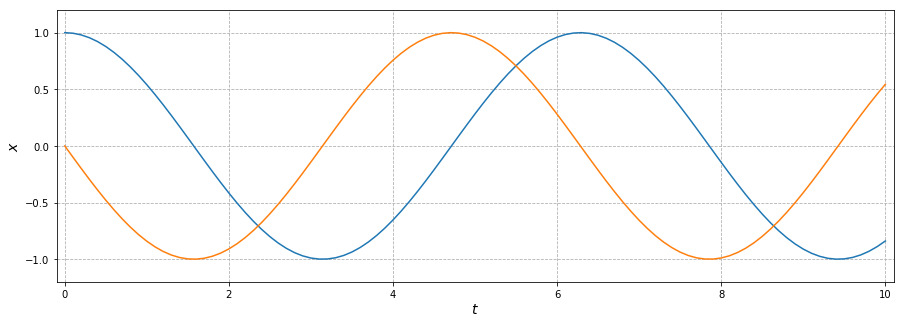

In [128]:
#Example: harmonic oscillator x'' + x = 0
y,t=solver(lambda t,x:np.array([x[1],-x[0]]),0,10,np.array([1,0]),100,rk4step)
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,y)
plt.margins(.01,.1)
plt.xlabel('$t$',size=14)
plt.ylabel('$x$',size=14)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

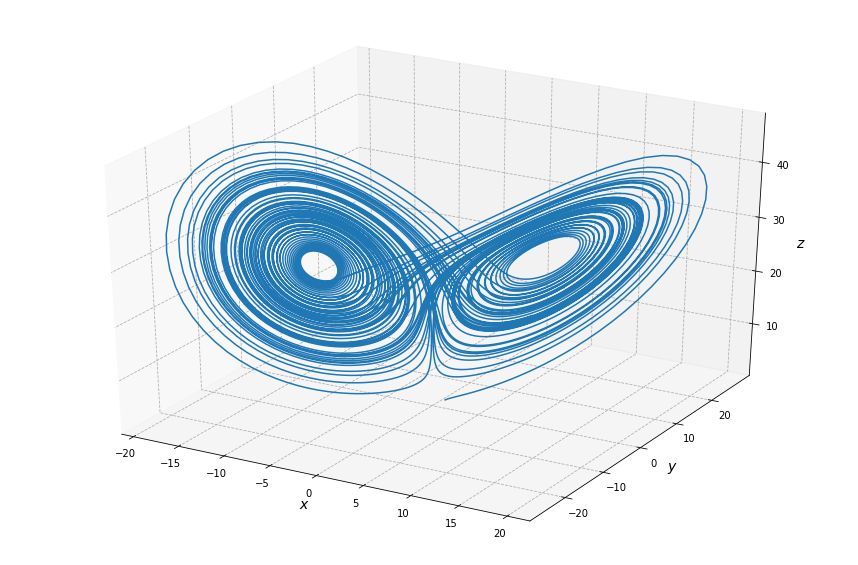

In [119]:
#Example: Lorenz system
x,t=solver(lorenz,0,80,np.array([1,1,1]),10000,rk4step)
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot([xi[0] for xi in x],[xi[1] for xi in x],[xi[2] for xi in x])
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$y$',size=14)
ax.set_zlabel('$z$',size=14)
plt.show()

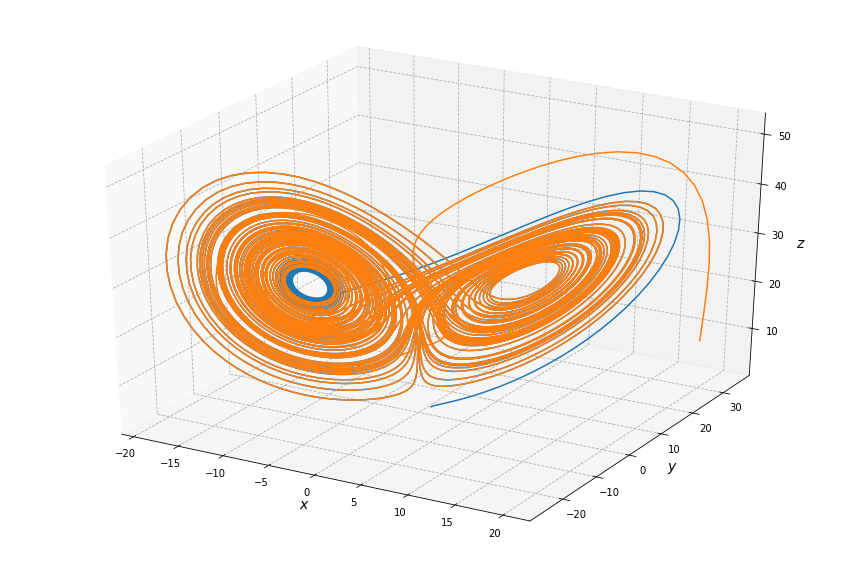

In [142]:
#Synchronization of Lorenz systems
T = 80
gamma = np.array([9,0,0])#x-drive
x,t=solver(lorenz2,0,T,np.array([1,1,1,20,30,10]),10000,rk4step)
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot([xi[0] for xi in x],[xi[1] for xi in x],[xi[2] for xi in x])
ax.plot([xi[3] for xi in x],[xi[4] for xi in x],[xi[5] for xi in x])
ax.set_xlabel('$x$',size=14)
ax.set_ylabel('$y$',size=14)
ax.set_zlabel('$z$',size=14)
plt.show()

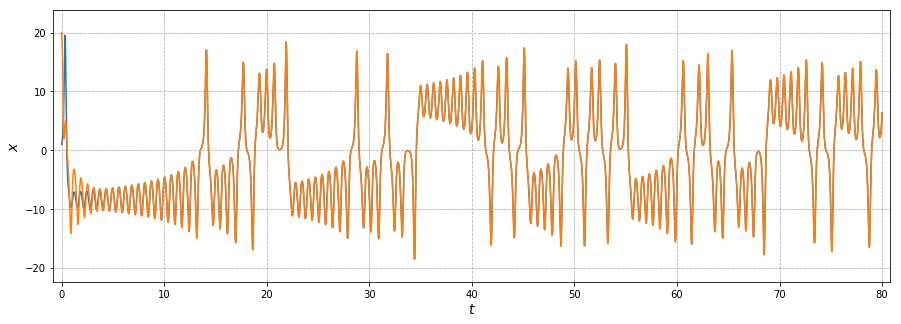

In [143]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,[xi[0] for xi in x])
plt.plot(t,[xi[3] for xi in x])
plt.xlabel('$t$',size=14)
plt.ylabel('$x$',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

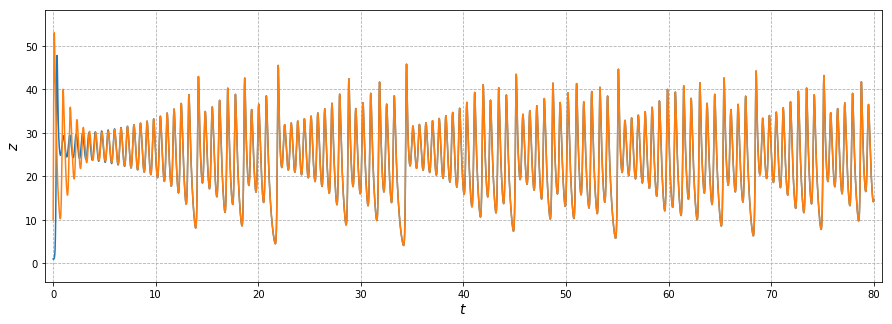

In [144]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
plt.plot(t,[xi[2] for xi in x])
plt.plot(t,[xi[5] for xi in x])
plt.xlabel('$t$',size=14)
plt.ylabel('$z$',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()

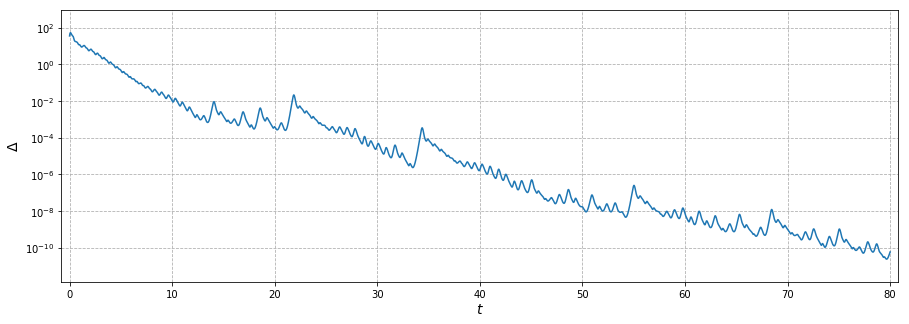

In [162]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
T = 80
gamma = np.array([10,0,0])#x-drive
#gamma = np.array([0,7,0])#y-drive
#gamma = np.array([0,0,6])#z-drive
x,t=solver(lorenz2,0,T,np.array([1,1,1,20,30,10]),10000,rk4step)
plt.plot(t,[np.linalg.norm(xi[:3]-xi[3:]) for xi in x])
plt.semilogy()
plt.xlabel('$t$',size=14)
plt.ylabel('error',size=14)
plt.margins(.01,.1)
plt.rcParams['grid.linestyle'] = "--"
plt.grid()
plt.show()